# Customer Segmentation using KMeans Clustering

This notebook provides a practical walkthrough of applying KMeans clustering to real-world customer transaction data. It covers the full pipeline from data cleaning and RFM feature engineering to cluster modeling and evaluation.

The main objective is to segment customers into meaningful groups based on their purchasing behavior such as how recently, how often, and how much they buy to support targeted marketing strategies and customer relationship management.

### Step 1: Import Necessary Libraries
We import libraries for data manipulation (`pandas`, `numpy`), visualization (`matplotlib`), and preprocessing (`StandardScaler`).

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

### Step 2: Load the Dataset
Load the dataset from a CSV file.

In [2]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Step 3: Data Cleaning - Missing Values
Check for null values in the dataset.

In [3]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Fill missing descriptions with 'Unknown'.

In [6]:
df['Description'] = df['Description'].fillna('Unknown')

Drop rows with missing `CustomerID` values.

In [8]:
df = df.dropna(subset=['CustomerID'])

In [9]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Step 4: Convert Data Types
Ensure date columns are in datetime format.

In [10]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [12]:
df.loc[:,'InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [13]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

### Step 5: Filter Invalid Entries
Remove entries with zero or negative `Quantity` or `UnitPrice`.

In [16]:
df[df['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [20]:
df[df['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom


In [21]:
df = df[df['UnitPrice'] > 0]
df = df[df['Quantity'] > 0]

### Step 6: Remove Duplicates
Check for and drop duplicate rows.

In [22]:
df.duplicated().sum()

np.int64(5192)

In [23]:
df = df.drop_duplicates()

### Step 7: Add Total Price Column
Create a new column representing the total transaction value.

In [33]:
df.loc[:,'TotalPrice'] = df['Quantity'] * df['UnitPrice']

/var/folders/nd/4yx58_596_17_9wz_k7lbl0h0000gn/T/ipykernel_96787/159740024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'TotalPrice'] = df['Quantity'] * df['UnitPrice']


### Step 8: Focus on UK Customers
Limit the dataset to customers from the United Kingdom.

In [27]:
df['Country'].value_counts()

Country
United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


In [28]:
df = df[df['Country'] == 'United Kingdom']

In [34]:
df.shape

(349203, 10)

### Step 9: Create RFM Table
Generate Recency, Frequency, and Monetary values for each customer.

In [36]:
latest_date = df['InvoiceDate'].max()

In [37]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'nunique',                                  
    'TotalPrice': 'sum'   
})

In [38]:
rfm.describe()

,InvoiceDate,InvoiceNo,TotalPrice
count,3920.000000,3920.000000,3920.000000
mean,91.208418,4.246429,1858.424654
std,99.533854,7.199202,7478.631256
min,0.000000,1.000000,3.750000
25%,17.000000,1.000000,298.185000
50%,50.000000,2.000000,644.975000
75%,142.000000,5.000000,1571.285000
max,373.000000,209.000000,259657.300000


Rename RFM columns for clarity.

In [39]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.reset_index(inplace=True)

In [40]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000,3920.000000
mean,15562.059694,91.208418,4.246429,1858.424654
std,1576.594671,99.533854,7.199202,7478.631256
min,12346.000000,0.000000,1.000000,3.750000
25%,14208.750000,17.000000,1.000000,298.185000
50%,15569.500000,50.000000,2.000000,644.975000
75%,16913.250000,142.000000,5.000000,1571.285000
max,18287.000000,373.000000,209.000000,259657.300000


### Step 10: Standardize Data
Scale the RFM values using `StandardScaler`.

In [41]:
scalar = StandardScaler()
rfm_std = scalar.fit_transform(rfm)


### Step 11: Find Optimal Clusters
Use the Elbow method to determine optimal number of clusters.

In [42]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,
               n_init=10,
               max_iter=300,
               random_state=1)
    km.fit(rfm_std)
    distortions.append(km.inertia_)

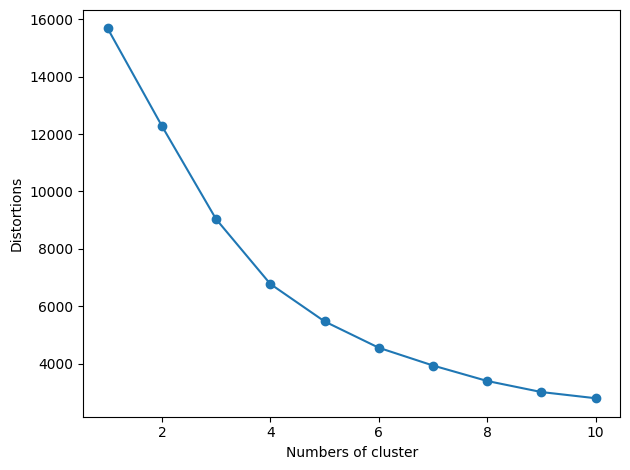

In [43]:
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Numbers of cluster')
plt.ylabel('Distortions')
plt.tight_layout()
plt.show()

### Step 12: Apply KMeans Clustering
Apply KMeans algorithm with chosen number of clusters.

In [66]:
km = KMeans(n_clusters=4,
               n_init=10,
               max_iter=300,
               random_state=1)
km.fit(rfm_std)
y_km = km.predict(rfm_std)

### Step 13: Evaluate Clustering
Use silhouette score to evaluate the quality of clusters.

In [67]:
score = silhouette_score(rfm_std,y_km)
print(score)

0.384704009225286


### Step 14: Plot Silhouette Scores
Plot individual silhouette scores for each cluster.

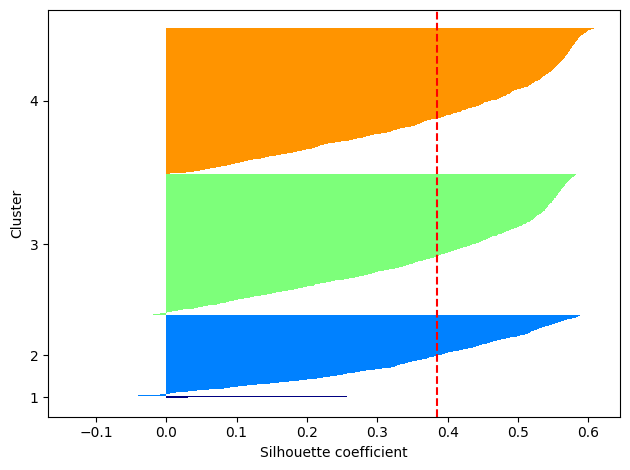

In [68]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(rfm_std, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

### Step 15: Assign Cluster Labels
Add the cluster labels to the RFM dataset.

In [69]:
rfm['Cluster'] = y_km

### Step 16: Analyze Clusters
Aggregate statistics by cluster to understand segment behavior.

In [70]:
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Num_Customers'}).reset_index()

print(cluster_summary)

   Cluster     Recency  Frequency      Monetary  Num_Customers
0        0   18.391304  59.913043  71418.253478             23
1        1  255.715777   1.532483    481.350454            862
2        2   44.266533   4.743487   1876.056968           1497
3        3   45.786736   4.451235   1572.837088           1538


### Step 17: Name Clusters
Assign descriptive names to each cluster.

In [71]:
cluster_names = {
    0: 'VIP Customer',
    1: 'Inactive Customer',
    2: 'Loyal Customer',
    3: 'Regular Customer'
}
rfm['Segment'] = rfm['Cluster'].map(cluster_names)

### Final Step: View Final RFM Table
The final RFM table includes the assigned cluster for each customer.

In [73]:
print(rfm)

      CustomerID  Recency  Frequency  Monetary  Cluster            Segment
0        12346.0      325          1  77183.60        0       VIP Customer
1        12747.0        1         11   4196.01        2     Loyal Customer
2        12748.0        0        209  33053.19        0       VIP Customer
3        12749.0        3          5   4090.88        2     Loyal Customer
4        12820.0        2          4    942.34        2     Loyal Customer
...          ...      ...        ...       ...      ...                ...
3915     18280.0      277          1    180.60        1  Inactive Customer
3916     18281.0      180          1     80.82        3   Regular Customer
3917     18282.0        7          2    178.05        3   Regular Customer
3918     18283.0        3         16   2045.53        3   Regular Customer
3919     18287.0       42          3   1837.28        3   Regular Customer

[3920 rows x 6 columns]
